## Part 1 of the Stock Market Analysis Notebook - This notebook contains Data Cleaning, Feature Engineering and EDA

#### Import Necessary Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

### Getting historical data for P&G

In [2]:
# Create a ticker object
ticker = yf.Ticker("PG")

In [3]:
# Download historical data of Procter & Gamble from 02/03/2010 to 28/02/2024.
historical_data = ticker.history(
    start="2010-03-02",
    end="2024-02-28",
    interval="1d"
)

In [4]:
# Save to CSV file
historical_data.to_csv("PG_stock_data.csv")

### Getting historical data for J&J

In [5]:
# Create a ticker object
ticker = yf.Ticker("JNJ")

In [6]:
# Download historical data of Johnson & Johnson from 02/03/2010 to 28/02/2024.
historical_data = ticker.history(
    start="2010-03-02",
    end="2024-02-28",
    interval="1d"
)

In [7]:
# Save to CSV file
historical_data.to_csv("JNJ_stock_data.csv")

### Loading the data

In [8]:
raw_data_PG = pd.read_csv("PG_stock_data.csv")
raw_data_PG.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-03-02 00:00:00-05:00,41.153642,41.250519,40.908218,41.147182,8004000,0.0,0.0
1,2010-03-03 00:00:00-05:00,41.114898,41.269903,40.966352,41.043854,8608300,0.0,0.0
2,2010-03-04 00:00:00-05:00,41.108450,41.431375,40.953444,41.121365,8600300,0.0,0.0
3,2010-03-05 00:00:00-05:00,41.134274,41.192400,40.720929,41.134274,10101100,0.0,0.0
4,2010-03-08 00:00:00-05:00,41.043855,41.121356,40.708012,40.811348,11293300,0.0,0.0


In [9]:
raw_data_JNJ = pd.read_csv("JNJ_stock_data.csv")
raw_data_JNJ.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-03-02 00:00:00-05:00,41.085338,41.299492,40.897141,41.169701,9014000,0.0,0.0
1,2010-03-03 00:00:00-05:00,41.267046,41.370879,41.026933,41.143745,9360400,0.0,0.0
2,2010-03-04 00:00:00-05:00,41.228108,41.338431,41.124275,41.254066,8067200,0.0,0.0
3,2010-03-05 00:00:00-05:00,41.312471,41.578542,41.241085,41.559074,10633600,0.0,0.0
4,2010-03-08 00:00:00-05:00,41.585050,41.799207,41.546110,41.662922,33380500,0.0,0.0


## Data Cleaning

In [10]:
raw_data_JNJ['Date'] = pd.to_datetime(raw_data_JNJ['Date'], utc=True).dt.date

In [11]:
raw_data_PG['Date'] = pd.to_datetime(raw_data_PG['Date'], utc = True).dt.date

In [12]:
# set Date as index
raw_data_PG.set_index('Date', inplace=True)

raw_data_JNJ.set_index('Date', inplace=True)

In [13]:
raw_data_PG.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-03-02,41.153642,41.250519,40.908218,41.147182,8004000,0.0,0.0
2010-03-03,41.114898,41.269903,40.966352,41.043854,8608300,0.0,0.0
2010-03-04,41.108450,41.431375,40.953444,41.121365,8600300,0.0,0.0
2010-03-05,41.134274,41.192400,40.720929,41.134274,10101100,0.0,0.0
2010-03-08,41.043855,41.121356,40.708012,40.811348,11293300,0.0,0.0


In [14]:
# Drop Dividends and Stock Splits column
raw_data_PG.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

raw_data_JNJ.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [15]:
raw_data_PG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-02,41.153642,41.250519,40.908218,41.147182,8004000
2010-03-03,41.114898,41.269903,40.966352,41.043854,8608300
2010-03-04,41.108450,41.431375,40.953444,41.121365,8600300
2010-03-05,41.134274,41.192400,40.720929,41.134274,10101100
2010-03-08,41.043855,41.121356,40.708012,40.811348,11293300


In [16]:
# Create a profile Report
profile = ProfileReport(raw_data_PG, title='PG Stock Market Profiling Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Feature Engineering

In [17]:
# Computing daily returns (percentage change in Close price)
raw_data_PG['Returns'] = raw_data_PG['Close'].pct_change() * 100

raw_data_JNJ['Returns'] = raw_data_JNJ['Close'].pct_change() * 100 

In [18]:
# Creating tomorrow's price column by shifting Close price up by 1 day
raw_data_PG['Tomorrow'] = raw_data_PG['Close'].shift(-1)

raw_data_JNJ['Tomorrow'] = raw_data_JNJ['Close'].shift(-1)

In [19]:
# Creating direction column (1 if price goes up, 0 if it goes down)
raw_data_PG['Stock_Direction'] = (raw_data_PG['Tomorrow'] > raw_data_PG['Close']).astype(int)

raw_data_JNJ['Stock_Direction'] = (raw_data_JNJ['Tomorrow'] > raw_data_JNJ['Close']).astype(int)

In [20]:
raw_data_PG

,Open,High,Low,Close,Volume,Returns,Tomorrow,Stock_Direction
Date,,,,,,,,
2010-03-02,41.153642,41.250519,40.908218,41.147182,8004000,NaN,41.043854,0
2010-03-03,41.114898,41.269903,40.966352,41.043854,8608300,-0.251120,41.121365,1
2010-03-04,41.108450,41.431375,40.953444,41.121365,8600300,0.188849,41.134274,1
2010-03-05,41.134274,41.192400,40.720929,41.134274,10101100,0.031392,40.811348,0
2010-03-08,41.043855,41.121356,40.708012,40.811348,11293300,-0.785052,40.882401,1
...,...,...,...,...,...,...,...,...
2024-02-21,155.356788,156.537643,155.356788,156.537643,7121000,1.192359,156.693802,1
2024-02-22,155.620298,157.211039,154.810282,156.693802,6619500,0.099758,157.152466,1
2024-02-23,156.732827,157.845376,156.303420,157.152466,5486500,0.292714,156.361984,0


In [21]:
# Drop the last row since it will have NaN in Tomorrow column
raw_data_PG.dropna(inplace=True)

raw_data_JNJ.dropna(inplace=True)

In [22]:
raw_data_PG.head()

,Open,High,Low,Close,Volume,Returns,Tomorrow,Stock_Direction
Date,,,,,,,,
2010-03-03,41.114898,41.269903,40.966352,41.043854,8608300,-0.251120,41.121365,1
2010-03-04,41.108450,41.431375,40.953444,41.121365,8600300,0.188849,41.134274,1
2010-03-05,41.134274,41.192400,40.720929,41.134274,10101100,0.031392,40.811348,0
2010-03-08,41.043855,41.121356,40.708012,40.811348,11293300,-0.785052,40.882401,1
2010-03-09,40.740315,41.011571,40.720938,40.882401,7100900,0.174100,40.695087,0


In [23]:
PG_data = raw_data_PG.copy()
PG_data.to_csv("PG_data.csv", index=False)

JNJ_data = raw_data_JNJ.copy()
JNJ_data.to_csv("JNJ_data.csv", index=False)

## Exploratory Data and Stock Market Analysis

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### 1. Historical Trends Analysis

In [25]:
# Calculate monthly average prices
PG_data.index = pd.to_datetime(PG_data.index)
JNJ_data.index = pd.to_datetime(JNJ_data.index)

PG_data['Month'] = PG_data.index.to_period('M')
JNJ_data['Month'] = JNJ_data.index.to_period('M')

monthly_avg_pg = PG_data.groupby('Month')['Close'].mean()
monthly_avg_jnj = JNJ_data.groupby('Month')['Close'].mean()

In [26]:
monthly_avg_pg.head()

Month
2010-03    41.079222
2010-04    40.779463
2010-05    40.315493
2010-06    39.784154
2010-07    40.226005
Freq: M, Name: Close, dtype: float64

In [27]:
monthly_avg_jnj.head()

Month
2010-03    41.878303
2010-04    42.298884
2010-05    40.699917
2010-06    38.601752
2010-07    38.678610
Freq: M, Name: Close, dtype: float64

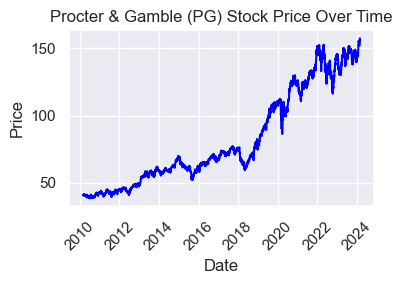

In [28]:
# Create PG stock price visualization
plt.figure(figsize=(4, 3))
plt.plot(PG_data.index, PG_data['Close'], color='blue')
plt.title('Procter & Gamble (PG) Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pg1.png", dpi=150, bbox_inches="tight")
plt.show()

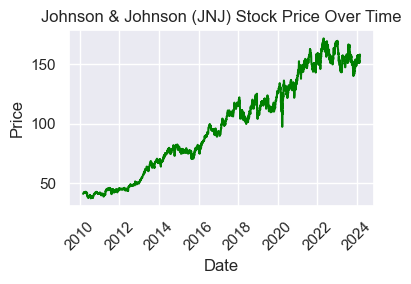

In [29]:
# Create JNJ stock price visualization
plt.figure(figsize=(4, 3))
plt.plot(JNJ_data.index, JNJ_data['Close'], color='green')
plt.title('Johnson & Johnson (JNJ) Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("jnj1.png", dpi=150, bbox_inches="tight")

plt.show()

The first plot shows the stock price trend of Procter & Gamble (PG) over time. The stock price has shown a steady upward trend since 2010, with some fluctuations. Notable dips are observed around 2015 and 2020, likely due to market corrections or external factors. Despite these fluctuations, the overall trajectory remains positive, reaching new highs by 2024.

The second plot presents the stock price trend of Johnson & Johnson (JNJ). Similar to PG, JNJ's stock price has followed an upward trend from 2010, with a significant increase around 2014. The stock experienced some periods of volatility, especially around 2020, but has maintained a relatively stable pattern since then, with prices fluctuating within a range in recent years.

Both stocks exhibit long-term growth, with occasional market-driven corrections, reflecting their resilience in the consumer goods and healthcare sectors.

#### 2. Risk Metrics

In [30]:
# Calculate annualized volatility (assuming 252 trading days)
pg_ann_vol = PG_data['Returns'].std() * np.sqrt(252)
jnj_ann_vol = JNJ_data['Returns'].std() * np.sqrt(252)

# Calculate annualized returns
pg_ann_return = PG_data['Returns'].mean() * 252
jnj_ann_return = JNJ_data['Returns'].mean() * 252

# Calculate Sharpe Ratio (assuming risk-free rate of 2%)
rf = 0.02
pg_sharpe = (pg_ann_return - rf) / pg_ann_vol
jnj_sharpe = (jnj_ann_return - rf) / jnj_ann_vol

In [31]:
pg_sharpe

0.6390366941018896

In [32]:
jnj_sharpe

0.6532108117382046

Looking at these numbers:

PG (Procter & Gamble): 0.64
JNJ (Johnson & Johnson): 0.65

Think of it like this: both companies are playing it pretty safe, like choosing to drive at a steady speed rather than racing down the highway! They're basically neck and neck in terms of how much reward you get for the risk you're taking.
The 0.6-ish scores tell us these stocks are kind of like your reliable friend - not going to make you rich overnight, but probably won't let you down either. We're talking about companies that make everyday products - PG makes stuff like Tide and Gillette, while JNJ makes Band-Aids and baby shampoo. Pretty basic, right?
A score of 1.0 would be like getting an A grade, so these companies are scoring more like a B-. But hey, that's not bad! They're like the steady players on your team - not the star athletes, but the ones you can count on to show up and do their job every day.
Bottom line: These stocks probably won't give you dramatic ups and downs - they're more like a smooth sailing kind of investment. They might be perfect for someone who wants to sleep well at night knowing their investment isn't going on a roller coaster ride!

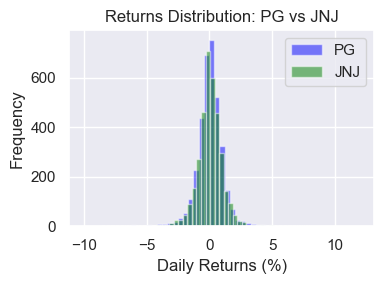

In [33]:
# Returns Distribution
plt.figure(figsize=(4, 3))
plt.hist(PG_data['Returns'], bins=50, alpha=0.5, label='PG', color='blue')
plt.hist(JNJ_data['Returns'], bins=50, alpha=0.5, label='JNJ', color='green')
plt.title('Returns Distribution: PG vs JNJ')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig("returns.png", dpi=150, bbox_inches="tight")
plt.show()

The histogram shows the daily returns of Procter & Gamble (PG) and Johnson & Johnson (JNJ). Both stocks have most of their returns centered around zero, with fewer extreme values. The similar shape of the distributions suggests that their daily price movements are quite alike, with occasional periods of higher volatility.
Overall, the similar shape and spread of the distributions suggest that PG and JNJ have comparable risk-return profiles over the analyzed period.

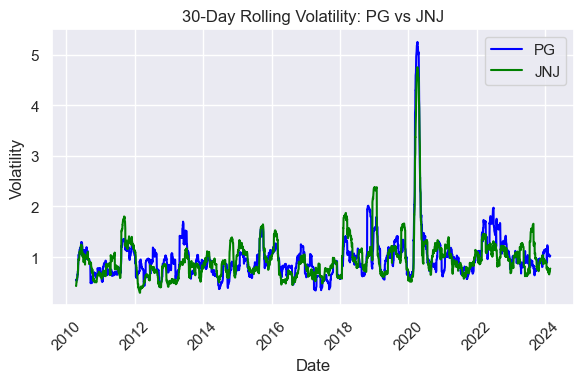

In [47]:
# Calculate 30-day rolling volatility
PG_data['Rolling_Vol'] = PG_data['Returns'].rolling(window=30).std()
JNJ_data['Rolling_Vol'] = JNJ_data['Returns'].rolling(window=30).std()

# Plot Rolling Volatility
plt.figure(figsize=(6, 4))
plt.plot(PG_data.index, PG_data['Rolling_Vol'], label='PG', color='blue')
plt.plot(JNJ_data.index, JNJ_data['Rolling_Vol'], label='JNJ', color='green')
plt.title('30-Day Rolling Volatility: PG vs JNJ')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rolling_v.png", dpi=150, bbox_inches="tight")
plt.show()

Key insights from the graph include:

Both stocks exhibit similar patterns of volatility, with peaks during periods of market turbulence (e.g., the sharp spike around 2020 likely corresponds to the COVID-19 pandemic).
PG (blue line) and JNJ (green line) generally maintain low volatility levels, with occasional surges driven by broader market events.
This visualization helps analyze the relative stability of the two stocks and their responsiveness to external factors.

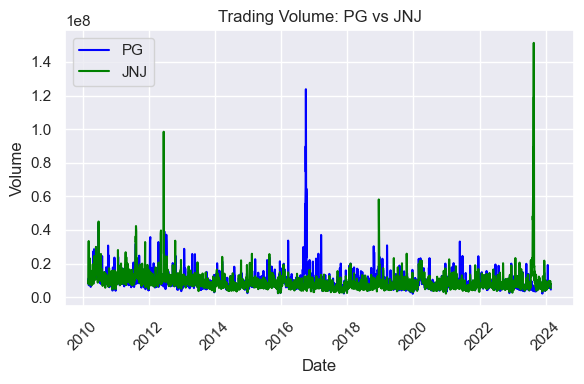

In [35]:
# Volume Analysis
plt.figure(figsize=(6, 4))
plt.plot(PG_data.index, PG_data['Volume'], label='PG', color='blue')
plt.plot(JNJ_data.index, JNJ_data['Volume'], label='JNJ', color='green')
plt.title('Trading Volume: PG vs JNJ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("trade_volume.png", dpi=150, bbox_inches="tight")
plt.show()

Key observations:

The y-axis represents the trading volume, measured in shares, while the x-axis tracks the date.
Both stocks show consistent trading volumes, with occasional large spikes.
Notable spikes indicate periods of unusually high trading activity, possibly driven by significant company announcements, market events, or broader economic changes.

#### 3. Comparative Analysis

In [36]:
# Create comparative analysis DataFrame
metrics = {
    'Metric': ['Annualized Return (%)', 'Annualized Volatility (%)', 'Sharpe Ratio',
               'Average Daily Volume', 'Up Days (%)', 'Maximum Daily Gain (%)', 
               'Maximum Daily Loss (%)'],
    'PG': [pg_ann_return, 
           pg_ann_vol,
           pg_sharpe,
           PG_data['Volume'].mean(),
           (PG_data['Stock_Direction'].mean() * 100),
           PG_data['Returns'].max(),
           PG_data['Returns'].min()],
    'JNJ': [jnj_ann_return,
            jnj_ann_vol,
            jnj_sharpe,
            JNJ_data['Volume'].mean(),
            (JNJ_data['Stock_Direction'].mean() * 100),
            JNJ_data['Returns'].max(),
            JNJ_data['Returns'].min()]
}

comparison_df = pd.DataFrame(metrics)
print("\nComparative Analysis:")
print(comparison_df.round(2))


Comparative Analysis:
                      Metric          PG         JNJ
0      Annualized Return (%)       11.05       11.00
1  Annualized Volatility (%)       17.25       16.81
2               Sharpe Ratio        0.64        0.65
3       Average Daily Volume  8845387.64  8735855.37
4                Up Days (%)       52.39       51.76
5     Maximum Daily Gain (%)       12.01        8.00
6     Maximum Daily Loss (%)       -8.74      -10.04


Returns & Growth

Both stocks grow similarly at 11% per year. PG performs just a tiny bit better, beating JNJ by 0.05%.
Risk & Safety
JNJ plays it slightly safer with less ups and downs in price (16.81% volatility vs PG's 17.25%). While JNJ had one really bad day (-10.04%), PG's best day (12.01%) beat JNJ's best (8%).

Trading Activity

They're neck and neck in daily trading - both see about 8.8 million shares traded daily. PG edges ahead with more winning days (52.39% vs 51.76%).
Bottom line? These stocks are very similar, like two peas in a pod. JNJ might be your pick if you want slightly less risk, while PG could be better if you're chasing slightly higher returns.

#### 4. Investment Suitability Analysis

In [37]:
# Calculate risk-adjusted metrics
def calculate_investment_metrics(df):
    # Maximum Drawdown
    roll_max = df['Close'].expanding().max()
    drawdowns = df['Close']/roll_max - 1.0
    max_drawdown = drawdowns.min()
    
    # Recovery Rate (% of up days)
    recovery_rate = df['Stock_Direction'].mean() * 100
    
    # Risk-Adjusted Return (Return per unit of risk)
    risk_adj_return = (df['Returns'].mean() / df['Returns'].std())
    
    return max_drawdown, recovery_rate, risk_adj_return

# Calculate metrics for both stocks
pg_metrics = calculate_investment_metrics(PG_data)
jnj_metrics = calculate_investment_metrics(JNJ_data)

# Create investment suitability analysis
print("\nInvestment Suitability Analysis:")
suitability_df = pd.DataFrame({
    'Metric': ['Maximum Drawdown (%)', 'Recovery Rate (%)', 'Risk-Adjusted Return'],
    'PG': [pg_metrics[0] * 100, pg_metrics[1], pg_metrics[2]],
    'JNJ': [jnj_metrics[0] * 100, jnj_metrics[1], jnj_metrics[2]]
})
print(suitability_df.round(2))


Investment Suitability Analysis:
                 Metric     PG    JNJ
0  Maximum Drawdown (%) -25.46 -27.37
1     Recovery Rate (%)  52.39  51.76
2  Risk-Adjusted Return   0.04   0.04


Maximum Drawdown shows the biggest drop from peak value:

PG's worst drop: -25.46%
JNJ's worst drop: -27.37%
PG held up slightly better during tough times

Recovery Rate shows how often the stock moves up:

Both recover similarly
PG: wins 52.39% of trading days
JNJ: wins 51.76% of trading days

Risk-Adjusted Return (both 0.04) tells us:

Both stocks give identical returns for their risk level
This suggests they're equally efficient investments

Bottom line: Both stocks show very similar risk and recovery patterns, with PG showing slightly more resilience during market downturns.

## Fundamental Analysis

In [38]:
# Get financial data
start_date = '2010-03-02'
end_date = '2024-02-28'

pg = yf.Ticker("PG")
jnj = yf.Ticker("JNJ")

In [39]:
# Get quarterly financial statements to get more granular data
income_pg = pg.quarterly_financials 
balance_pg = pg.quarterly_balance_sheet
income_jnj = jnj.quarterly_financials
balance_jnj = jnj.quarterly_balance_sheet

In [40]:
# Sort index to ensure chronological order
income_pg = income_pg.sort_index(axis=1)
income_jnj = income_jnj.sort_index(axis=1)
balance_pg = balance_pg.sort_index(axis=1)
balance_jnj = balance_jnj.sort_index(axis=1)

#### 1. Revenue Analysis

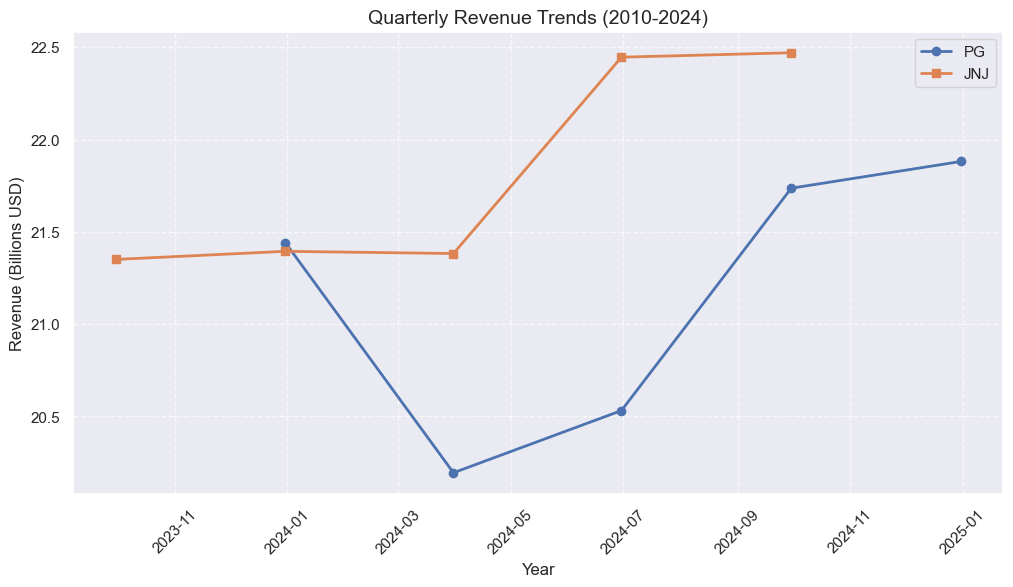

In [41]:
# Get revenue data
pg_revenue = income_pg.loc['Total Revenue']
jnj_revenue = income_jnj.loc['Total Revenue']

plt.figure(figsize=(12, 6))
plt.plot(pg_revenue.index, pg_revenue.values/1e9, marker='o', label='PG', linewidth=2)
plt.plot(jnj_revenue.index, jnj_revenue.values/1e9, marker='s', label='JNJ', linewidth=2)
plt.title('Quarterly Revenue Trends (2010-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue (Billions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.show()

PG (blue line) experienced a dip in revenue in early 2024, followed by a strong recovery in subsequent quarters.

JNJ (orange line) maintained relatively stable revenue levels throughout the period, showing consistent performance with slight growth.

The contrasting patterns highlight PG's short-term volatility compared to JNJ's steady revenue growth.

#### 2. Profit Margins

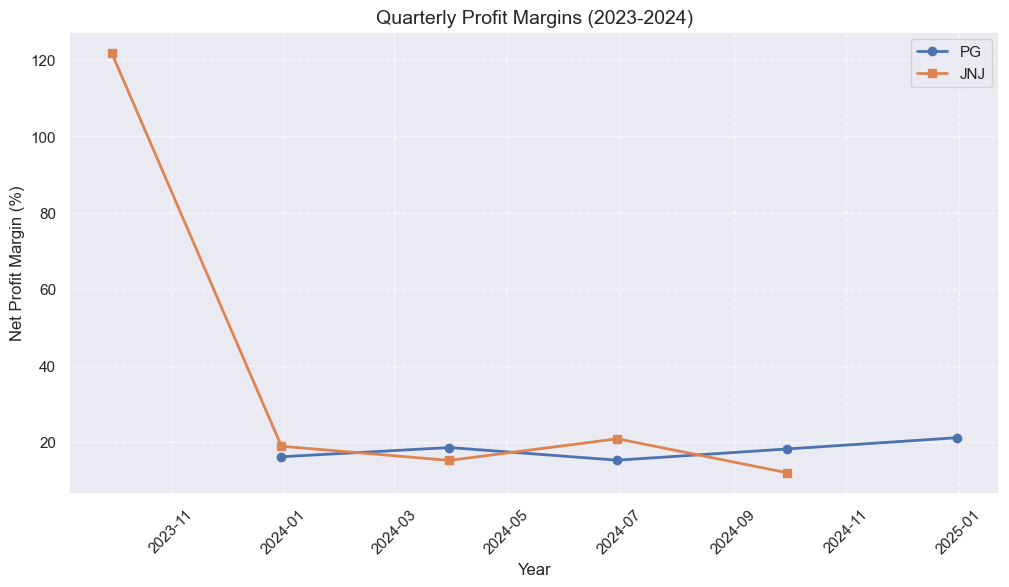

In [42]:
pg_margin = (income_pg.loc['Net Income'] / income_pg.loc['Total Revenue']) * 100
jnj_margin = (income_jnj.loc['Net Income'] / income_jnj.loc['Total Revenue']) * 100

plt.figure(figsize=(12, 6))
plt.plot(pg_margin.index, pg_margin.values, marker='o', label='PG', linewidth=2)
plt.plot(jnj_margin.index, jnj_margin.values, marker='s', label='JNJ', linewidth=2)
plt.title('Quarterly Profit Margins (2023-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.show()

JNJ (orange line) starts with an extremely high profit margin in late 2023, which drops steeply to align with PG's range by early 2024. This may indicate an anomaly or a one-off event in the earlier period

PG (blue line) shows steady and gradual growth in its profit margin over the observed period, reflecting consistent financial improvement.

Post-Q1 2024, both companies have comparable profit margins, fluctuating within the 15-25% range.

#### 3. Capital Structure

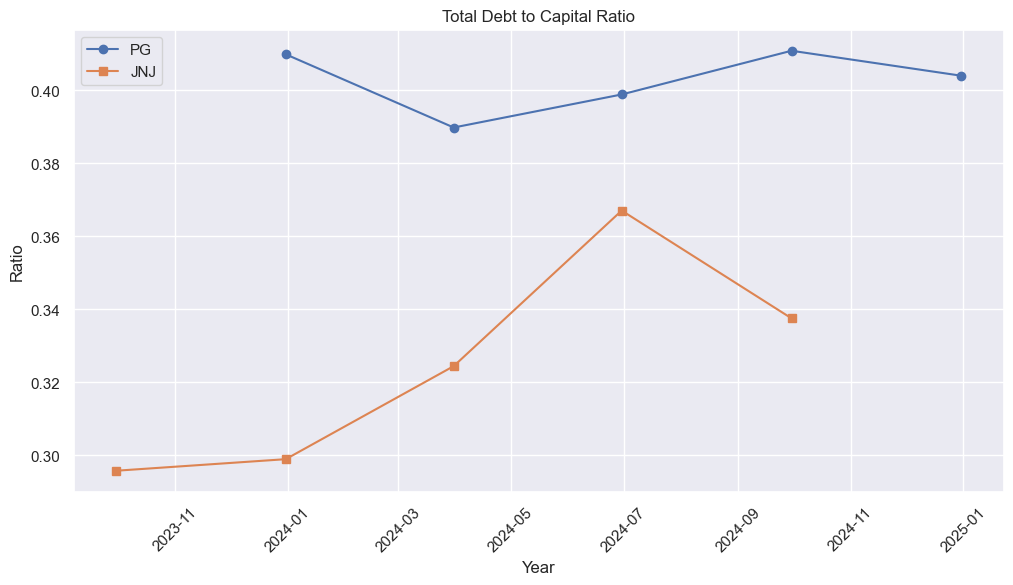

In [43]:
# Total Debt to Total Capital
pg_total_debt = balance_pg.loc['Total Debt']
pg_total_capital = pg_total_debt + balance_pg.loc['Stockholders Equity']
pg_debt_to_capital = pg_total_debt / pg_total_capital

jnj_total_debt = balance_jnj.loc['Total Debt']
jnj_total_capital = jnj_total_debt + balance_jnj.loc['Stockholders Equity']
jnj_debt_to_capital = jnj_total_debt / jnj_total_capital

plt.figure(figsize=(12, 6))
plt.plot(pg_debt_to_capital.index, pg_debt_to_capital.values, marker='o', label='PG')
plt.plot(jnj_debt_to_capital.index, jnj_debt_to_capital.values, marker='s', label='JNJ')
plt.title('Total Debt to Capital Ratio')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

PG (Blue Line)

PG's debt-to-capital ratio remains relatively stable, fluctuating around 0.39 to 0.41.
There is a slight decline early in 2024, followed by an upward trend peaking around mid-2024.
By early 2025, PG's ratio stabilizes near 0.40, indicating a steady financial leverage strategy.

JNJ (Orange Line)

JNJ starts with a lower debt-to-capital ratio of around 0.29.
The ratio shows a steady increase, peaking around mid-2024 at approximately 0.36.
After mid-2024, the ratio declines, suggesting possible debt reduction or increased equity financing.

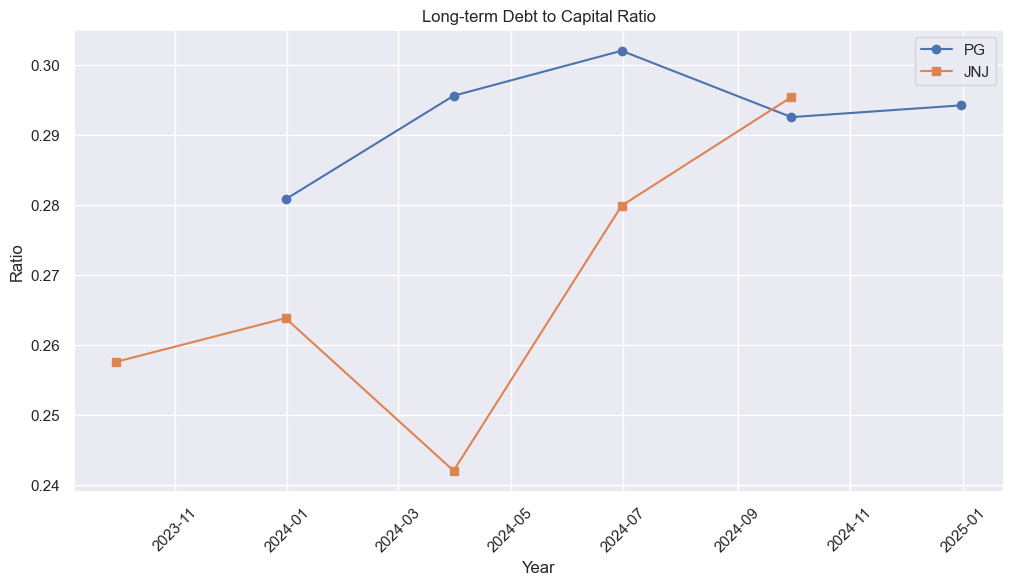

In [44]:
# Long-term Debt to Total Capital
pg_lt_debt = balance_pg.loc['Long Term Debt']
pg_lt_debt_to_capital = pg_lt_debt / pg_total_capital

jnj_lt_debt = balance_jnj.loc['Long Term Debt']
jnj_lt_debt_to_capital = jnj_lt_debt / jnj_total_capital

plt.figure(figsize=(12, 6))
plt.plot(pg_lt_debt_to_capital.index, pg_lt_debt_to_capital.values, marker='o', label='PG')
plt.plot(jnj_lt_debt_to_capital.index, jnj_lt_debt_to_capital.values, marker='s', label='JNJ')
plt.title('Long-term Debt to Capital Ratio')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

PG's ratio starts at around 0.28 and rises to 0.30 by mid-2024. After that, it slightly declines and stabilizes near 0.29 by early 2025. This suggests that PG increased its long-term debt but later maintained a stable level.

JNJ's ratio starts at about 0.26 and drops to 0.24 in early 2024. It then rises sharply, reaching 0.29 by late 2024. This pattern indicates fluctuations in JNJ’s long-term financing, possibly due to debt repayments followed by new debt issuance.

PG's ratio remains relatively stable, while JNJ's ratio changes more significantly. By late 2024, both companies have similar long-term debt-to-capital ratios, suggesting they may be following similar financing strategies.

In [45]:
# Print capital structure composition
print("\nLatest Capital Structure Composition:")
print("\nPG:")
print(f"Total Debt: {pg_total_debt.iloc[-1]/1e9:.2f}B")
print(f"Long-term Debt: {pg_lt_debt.iloc[-1]/1e9:.2f}B")
print(f"Equity: {balance_pg.loc['Stockholders Equity'].iloc[-1]/1e9:.2f}B")

print("\nJNJ:")
print(f"Total Debt: {jnj_total_debt.iloc[-1]/1e9:.2f}B")
print(f"Long-term Debt: {jnj_lt_debt.iloc[-1]/1e9:.2f}B")
print(f"Equity: {balance_jnj.loc['Stockholders Equity'].iloc[-1]/1e9:.2f}B")


Latest Capital Structure Composition:

PG:
Total Debt: 34.69B
Long-term Debt: 25.26B
Equity: 51.17B

JNJ:
Total Debt: 35.75B
Long-term Debt: 31.29B
Equity: 70.16B


#### 4. Stock Price vs Revenue Correlation

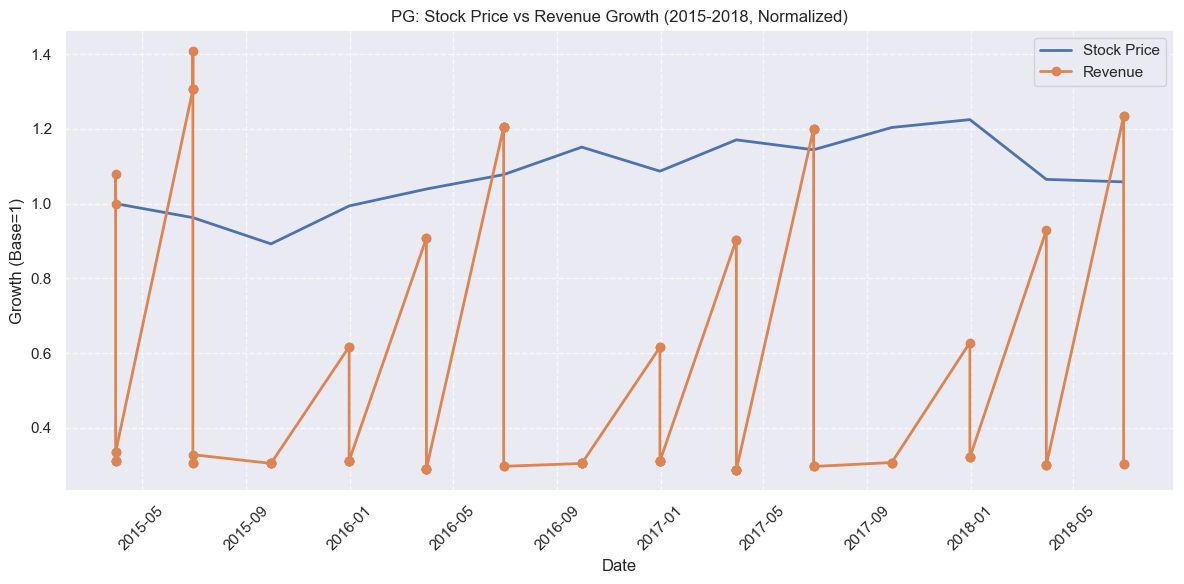


Growth Analysis (2015-2018):
Stock Price Growth: 5.82%
Revenue Growth: -69.55%

Correlation between Stock Price and Revenue: -0.11


In [46]:
# First get the SEC EDGAR data
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def get_sec_data(ticker):
    # SEC company filings URL
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{ticker}.json"
    
    # Headers required by SEC
    headers = {
        'User-Agent': 'Promise Sunday (sundaepromix@gmail.com)'  # Replace with your info
    }
    
    response = requests.get(url, headers=headers)
    return response.json()

# Get PG data (PG's CIK number is 0000080424)
pg_data = get_sec_data("0000080424")

# Now we can proceed with our analysis
start_date = '2015-01-01'
end_date = '2018-12-31'

# Get stock price data
stock_pg = pg.history(start=start_date, end=end_date)['Close']
stock_pg_quarterly = stock_pg.resample('Q').last()
stock_pg_quarterly.index = stock_pg_quarterly.index.tz_localize(None)

# Get revenue data
sales_df = pd.DataFrame(pg_data['facts']['us-gaap']['SalesRevenueNet']['units']['USD'])
sales_df['end'] = pd.to_datetime(sales_df['end'])
sales_df = sales_df[(sales_df['end'] >= start_date) & (sales_df['end'] <= end_date)]
sales_df = sales_df.set_index('end')

# Find common dates
common_dates = pd.Index(sorted(set(stock_pg_quarterly.index) & set(sales_df.index)))

# Align and normalize data
stock_aligned = stock_pg_quarterly.loc[common_dates]
revenue_aligned = sales_df.loc[common_dates, 'val']

norm_price = stock_aligned / stock_aligned.iloc[0]
norm_revenue = revenue_aligned / revenue_aligned.iloc[0]

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(norm_price.index, norm_price.values, label='Stock Price', linewidth=2)
plt.plot(norm_revenue.index, norm_revenue.values, label='Revenue', marker='o', linewidth=2)
plt.title('PG: Stock Price vs Revenue Growth (2015-2018, Normalized)')
plt.xlabel('Date')
plt.ylabel('Growth (Base=1)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print performance metrics
print("\nGrowth Analysis (2015-2018):")
print(f"Stock Price Growth: {((norm_price.iloc[-1] - 1) * 100):.2f}%")
print(f"Revenue Growth: {((norm_revenue.iloc[-1] - 1) * 100):.2f}%")

# Print correlation
correlation = norm_price.corr(norm_revenue)
print(f"\nCorrelation between Stock Price and Revenue: {correlation:.2f}")

The stock price shows a steady upward trend with minor fluctuations, indicating consistent market confidence in the company. In contrast, revenue growth exhibits high volatility, with frequent spikes and dips. This suggests that while revenue experiences significant short-term changes, the stock price remains relatively stable over time.

The difference in trends implies that PG's stock price may not be directly tied to short-term revenue changes but rather influenced by broader market factors and investor sentiment.